# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2001 Чуйкин Максим
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
!pip install PySimpleGUI
!pip install networkx
!pip install matplotlib
!pip install numpy
!pip install math
!pip install copy

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
ERROR: Could not find a version that satisfies the requirement copy (from versions: none)
ERROR: No matching distribution found for copy


3
6


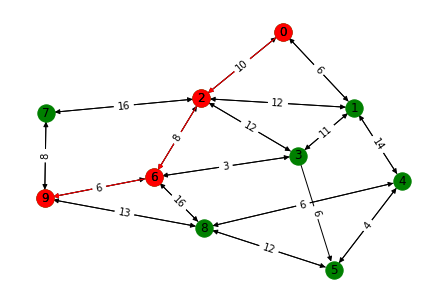

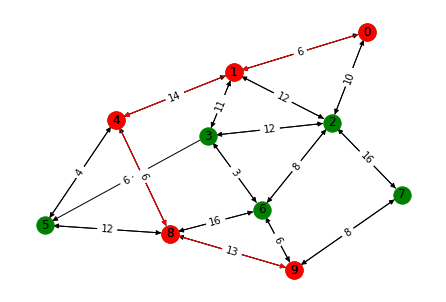

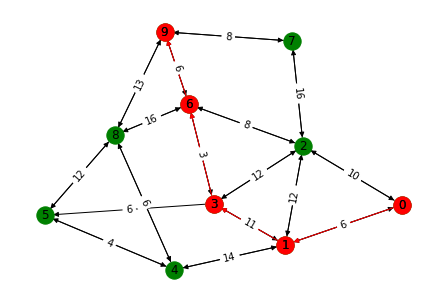

In [4]:
import PySimpleGUI as sg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import copy

def d_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)

    return result[::-1]

def get_path(P,end,start):
    path = [end]
    while end!=start:
        end = P[end][start]
        path.append(end)
    return path

def bellman_ford_path(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    edges = []
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and matrix[i][j] != math.inf:
                edges.append((i,j,matrix[i][j]))
    print(edges)
    from_pos = 0
    to_pos = 1
    edge_length = 2
    d = [math.inf] * len(matrix)
    d[start] = 0
    p = [-1] * len(matrix)
    while True:
        flag = False
        for j in range(len(edges)):
            if d[edges[j][from_pos]] < math.inf:
                if d[edges[j][to_pos]] > d[edges[j][from_pos]] + edges[j][edge_length]:
                    d[edges[j][to_pos]] = d[edges[j][from_pos]] + edges[j][edge_length]
                    p[edges[j][to_pos]] = edges[j][from_pos]
                    flag = True
        if not flag:
            break
    if d[end] == math.inf:
        return [], d
    else:
        path = []
        cur = end
        while cur != -1:
            path.append(cur)
            cur=p[cur]

        return path[::-1], d

def deixtr(matrix, start, end):
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]
    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < 9999 and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node

    if dist[end] == 9999:
        return [], dist
    else:
        return d_get_path(prev, start, end), dist

def fu(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            matrix[i][j] = int(matrix[i][j])
            if matrix[i][j] == 0:
                matrix[i][j] = 9999
    N = len(matrix)
    p = [[v for v in range(len(matrix))] for u in range(len(matrix))]

    for k in range(N):
        for i in range(N):
            for j in range(N):
                if matrix[i][j] > matrix[i][k] + matrix[k][j]:
                    matrix[i][j] = matrix[i][k] + matrix[k][j]
                    p[i][j] = k

    path = get_path(p, len(matrix)-1, 0)
    path.reverse()
    return path


def johns(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    bf_path, bf_dist = bellman_ford_path(matrix, start, end)

    if bf_dist == []:
        return []
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                matrix[i][j] += bf_dist[i] - bf_dist[j]
    paths = []
    dist = []
    for i in range(len(matrix)):
        p, d = deixtr(matrix, i, end)
        paths.append(p)
        dist.append(d)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if dist[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                dist[i][j] += bf_dist[j] - bf_dist[i]
    return paths[start]

def levit(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    researched = []
    queues = {1 : [start], 2 : []}
    not_visited = [i for i in range(len(matrix))]
    not_visited.remove(start)
    dist = [math.inf] * len(matrix)
    dist[start] = 0
    path = [[start] for i in range(len(matrix))]
    while len(queues[1]) or len(queues[2]):
        if len(queues[2]) != 0:
            cur = queues[2].pop(0)
        else:
            cur = queues[1].pop(0)
        for ver in range(len(matrix)):
            if ver in not_visited:
                dist[ver] = dist[cur] + matrix[cur][ver]
                not_visited.remove(ver)
                queues[1].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
            elif ver in queues[1] or ver in queues[2]:
                if matrix[cur][ver] != math.inf and dist[ver] > dist[cur] + matrix[cur][ver]:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
                dist[ver] = min(dist[ver], dist[cur] + matrix[cur][ver])
            elif ver in researched and dist[ver] > dist[cur] + matrix[cur][ver]:
                dist[ver] = dist[cur] + matrix[cur][ver]
                researched.remove(ver)
                queues[2].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
        researched.append(cur)
    result = path[end]
    return result


def md_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    return result[::-1]


def mod_dijkstra(matrix, start):
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]

    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node

    paths = []
    for i in range(len(matrix)):
        paths.append(md_get_path(prev, start, i))
    return dist, paths


def yen_path(matrix, start, end, k_max=1):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    candidates = set()

    d, p = mod_dijkstra(matrix, start)
    paths = [p[end]]
    dists = [d[end]]

    for k in range(1, k_max):
        cur_matrix = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1):
            node_spur = paths[-1][i]
            path_root = paths[-1][:i + 1]

            for line in paths:
                if path_root == line[:i + 1] and i + 1 < len(line):
                    cur_matrix[line[i]][line[i + 1]] = math.inf

            for node in path_root:
                if node != node_spur:
                    cur_matrix[node] = [math.inf] * len(matrix)

            d, p = mod_dijkstra(cur_matrix, node_spur)

            spur_path = p[end][1:]
            if len(spur_path) != 0:
                f_path = path_root
                for t_node in spur_path:
                    f_path.append(t_node)
                f_path = tuple(f_path)
                f_dist = 0
                for j in range(1, len(f_path)):
                    f_dist += matrix[f_path[j - 1]][f_path[j]]
                candidates.add((f_path, f_dist))

            if not len(candidates):
                break

            temp_candidates = list(candidates)
            paths.append(list(temp_candidates[0][0]))
            dists.append(temp_candidates[0][1])
            candidates.remove(temp_candidates[0])

    result = []
    for i in range(len(paths)):
        if len(result) < k_max:
            result.append(paths[i])
        else:
            return result

def last_stage(matrix, start, end, var, k, ori=True, vzv=True) :
    #todo
    # сделать окошко или добавить элементы выбора на первое окно для выбора пользователем алгоритма
    if ori == True:
        g = nx.DiGraph()
        rg = nx.DiGraph()
    else:
        g = nx.Graph()
        rg = nx.Graph()

    for i in range(len(matrix)):
        g.add_node(i)

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if int(matrix[i][j]) != 0:
                g.add_edge(i, j, weight=matrix[i][j])

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = 9999

    # сделать конструкцию if для выбора алгоритма
    path = []
    if var == 1:
        path = fu(matrix=matrix)
    elif var == 2:
        path = deixtr(matrix, start, end)
    elif var == 3:
        path = bellman_ford_path(matrix, start, end)
    elif var == 4:
        path = johns(matrix, start, end)
    elif var == 5:
        path = levit(matrix, start, end)
    elif var == 6:
        path = yen_path(matrix, start, end, k)

    if var != 6:
        for i in range(len(path)):
            rg.add_node(path[i])
        for i in range(1, len(path[0])):
            rg.add_edge(path[i-1], path[i])
        labels = nx.get_edge_attributes(g, 'weight')

        for i in range(1, len(path)):
            g.add_edge(path[i - 1], path[i], color='red')

        pos = nx.spring_layout(g)
        print('Рисуем нахуй не 6-й')
        nx.draw(g, pos, with_labels=True, node_color='green')
        nx.draw(rg, pos, with_labels=True, node_color='red', edge_color='red')

        if vzv:
            labels = nx.get_edge_attributes(g, 'weight')
            nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
    else:
        for i in range(len(path)):
            plt.figure(i)
            rg = nx.DiGraph()
            for j in range(len(path[i])):
                rg.add_node(path[i][j])
            for j in range(1, len(path[i])):
                rg.add_edge(path[i][j - 1], path[i][j])
            labels = nx.get_edge_attributes(g, 'weight')

            for j in range(1, len(path[i])):
                g.add_edge(path[i][j - 1], path[i][j], color='red')

            pos = nx.spring_layout(g)
            nx.draw(g, pos, with_labels=True, node_color='green')
            nx.draw(rg, pos, with_labels=True, node_color='red', edge_color='red')

            if vzv:
                labels = nx.get_edge_attributes(g, 'weight')
                nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)


    plt.show()

def temporaly_element(n, data, inc, ori, vzv):
    matrix = []
    k = 0

    for i in range(n):
        temp = []
        for j in range(n):
            temp.append(int(data[k]))
            k += 1
        matrix.append(temp)
    if inc != True:
        matrix = np.array(matrix)
        am = (np.dot(matrix, matrix.T) > 0).astype(int)
        np.fill_diagonal(am, 0)
        matrix = am


    last_stage(matrix=matrix, ori=ori, vzv=vzv)

def get_menu(n, inc=True, ori=True, vzv=True):
    sg.theme('Dark Green')
    data = [['1' for col in range(n)] for row in range(n)]
    print(data)
    fs = [sg.Text('   ')]
    for i in range(n):
        fs.append(sg.Text('                                                 '+chr(65 + i)+'                     '))
    layout = [[fs]]

    for i in range(n):
        temp = [sg.Text(chr(65 + i))]
        for j in range(n):
            temp.append(sg.InputText())
        layout.append(temp)

    layout.append([sg.Button('Далее')])

    window = sg.Window('...', layout)
    while True:
        event, values = window.read()
        if event == sg.WINDOW_CLOSED or event == 'Далее':
            break
    window.close()
    temporaly_element(n, values, inc=inc, ori=ori, vzv=vzv)

def read_matrix( n, file):
    f = open(file)
    matrix = []
    for i in range(n):
        line = f.readline().split()
        temp = []
        for e in line:
            temp.append(int(e))
        matrix.append(temp)


    return matrix

def open_file(n, start, end, var, k=3):
    sg.theme('Dark Green')
    layout = [[sg.Text('Выберите файл'), sg.InputText(key='-file1'),sg.FileBrowse('Browse')],
              [sg.Button('Ok')]]
    window = sg.Window('...', layout)
    while True:
        event, values = window.read()
        if event == sg.WINDOW_CLOSED or event == 'Ok':
            break
    window.close()
    last_stage(matrix=read_matrix( n=n ,file=values['-file1']), start=start, end=end, var=var, k=k)

def start_menu():
    sg.theme('Dark Green')
    layout = [[sg.Text('Введите количество вершин графа(Максимум 5)'), sg.InputText()],
              [sg.Text('Обозначте характеристики графа')],[ sg.Checkbox('Взвешенный'), sg.Checkbox('Ориентированный')],
              [sg.Text('Выберите способ представления графа')], [sg.Radio('Матрица смежности', 0, default=True)], [sg.Radio('Матрица инцидентности', 0)],
              [sg.Text('Выберите способ загрузки графа')],
              [sg.Radio('Интерактивно', 1, default=True)],[sg.Radio('Из файла', 1)],
              [sg.Text('Выберите алгоритм для поиска пусти(ей)')],
              # с values[7]
              [sg.Radio('Алгоритм Флойда-Уоршера', 2, default=True), sg.Radio('Алгоритм Дейкстры', 2,), sg.Radio('Алгоритм Беллмана-Форда', 2,)],
              [sg.Radio('Алгоритм Джонсона', 2,), sg.Radio('Алгоритм Левита', 2,), sg.Radio('Алгоритм Йена', 2,)],
              [sg.Text('Введите стартовую вершину(нумерация с 0)'), sg.InputText()],
              [sg.Text('Введите конечную вершину(нумерация с 0)'), sg.InputText()],
              [sg.Text('Количество путей(для алгоритма Йена)'), sg.InputText()],
              [sg.Button('Далее')]]
    window = sg.Window('...', layout)
    while True:
        event, values = window.read()
        if event == sg.WINDOW_CLOSED or event == 'Далее':
            break
    window.close()
    print(values[15])
    var = 0
    for i in range(7, 13):
        if values[i]:
            var=i-6
    print(var)
    if event == 'Далее':
        if values[5] == True:
            if int(values[0]) > 5:
                values[0] = 5
            get_menu(n = int(values[0]), inc=values[3], ori=values[2], vzv=values[1])
        else:
            open_file(n=int(values[0]), start=int(values[13]), end=int(values[14]), var=var, k=int(values[15]))

start_menu()

#
# Содержимое текстового файла с тестовой матрицей:
# 0 6 10 0 0 0 0 0 0 0
# 6 0 12 11 14 0 0 0 0 0
# 10 12 0 12 0 0 8 16 0 0
# 0 11 12 0 0 6 3 0 0 0
# 0 14 0 0 0 4 0 0 6 0
# 0 0 0 0 4 0 0 0 12 0
# 0 0 8 3 0 0 0 0 16 6
# 0 0 16 0 0 0 0 0 0 8
# 0 0 0 0 6 12 16 0 0 13
# 0 0 0 0 0 0 6 8 13 0
#

### Вывод